In [4]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
file_path_trained = "Train_Tagged_Titles.tsv"
file_path_test = "test.tsv"

df = pd.read_csv(file_path_trained, sep='\t', quoting=3)
print(df.head())
print(df.Token.value_counts())
print(df.Tag.value_counts())

   Record Number                                              Title    Token  \
0              1  Supreme Nike SB Dunk High By any Means Red US1...  Supreme   
1              1  Supreme Nike SB Dunk High By any Means Red US1...     Nike   
2              1  Supreme Nike SB Dunk High By any Means Red US1...       SB   
3              1  Supreme Nike SB Dunk High By any Means Red US1...     Dunk   
4              1  Supreme Nike SB Dunk High By any Means Red US1...     High   

               Tag  
0           Modell  
1            Marke  
2     Produktlinie  
3              NaN  
4  Schuhschaft-Typ  
Sneaker            2569
Schuhe             1544
Herren             1387
Damen              1136
Turnschuhe          904
                   ... 
LaufschuheT642N       1
Kinsei                1
704                   1
1010884-25Y           1
U37                   1
Name: Token, Length: 9832, dtype: int64
No Tag                          10090
Marke                            4576
Produktart   

In [6]:

class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(r, t, to, ta) for r,t,to,ta in zip(s["Record Number"].values.tolist(),
                                                           s["Title"].values.tolist(),
                                                           s["Token"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Record Number").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [7]:
getter = SentenceGetter(df)
sentences = [[s[1] for s in sent] for sent in getter.sentences]
labels = [[s[3] for s in sent] for sent in getter.sentences]


In [8]:
tags_vals = list(set(df['Tag'].values))
print(tags_vals)

['Gewebeart', 'Akzente', 'Produktlinie', 'Herstellernummer', 'Aktivität', 'Modell', 'Verschluss', 'Thema', 'Stollentyp', 'Futtermaterial', 'Laufsohlenmaterial', 'Farbe', 'Abteilung', 'Charakter', 'UK-Schuhgröße', 'US-Schuhgröße', 'Schuhschaft-Typ', nan, 'Innensohlenmaterial', 'Obscure', 'Maßeinheit', 'EU-Schuhgröße', 'No Tag', 'Produktart', 'Zwischensohlen-Typ', 'Muster', 'Herstellungsland und -region', 'Dämpfungsgrad', 'Marke', 'Erscheinungsjahr', 'Anlass', 'Schuhweite', 'Stil', 'Charakter Familie', 'Obermaterial', 'Besonderheiten', 'Jahreszeit']


In [9]:
tags_vals.append('X')
tags_vals.append('[CLS]')
tags_vals.append('[SEP]')
tags_vals = set(tags_vals)
tags_vals

{'Abteilung',
 'Aktivität',
 'Akzente',
 'Anlass',
 'Besonderheiten',
 'Charakter',
 'Charakter Familie',
 'Dämpfungsgrad',
 'EU-Schuhgröße',
 'Erscheinungsjahr',
 'Farbe',
 'Futtermaterial',
 'Gewebeart',
 'Herstellernummer',
 'Herstellungsland und -region',
 'Innensohlenmaterial',
 'Jahreszeit',
 'Laufsohlenmaterial',
 'Marke',
 'Maßeinheit',
 'Modell',
 'Muster',
 'No Tag',
 'Obermaterial',
 'Obscure',
 'Produktart',
 'Produktlinie',
 'Schuhschaft-Typ',
 'Schuhweite',
 'Stil',
 'Stollentyp',
 'Thema',
 'UK-Schuhgröße',
 'US-Schuhgröße',
 'Verschluss',
 'X',
 'Zwischensohlen-Typ',
 '[CLS]',
 '[SEP]',
 nan}

In [10]:
tag2idx={'Abteilung' : 0,
 'Aktivität': 1,
 'Akzente': 2,
 'Anlass': 3,
 'Besonderheiten': 4,
 'Charakter': 5,
 'Charakter Familie': 6,
 'Dämpfungsgrad': 7,
 'EU-Schuhgröße': 8,
 'Erscheinungsjahr': 9,
 'Farbe': 10,
 'Futtermaterial': 11,
 'Gewebeart': 12,
 'Herstellernummer': 13,
 'Herstellungsland und -region': 14,
 'Innensohlenmaterial': 15,
 'Jahreszeit':16,
 'Laufsohlenmaterial':17,
 'Marke':18,
 'Maßeinheit':19,
 'Modell':20,
 'Muster':22,
 'No Tag':21,
 'Obermaterial':23,
 'Obscure':24,
 'Produktart':25,
 'Produktlinie':26,
 'Schuhschaft-Typ':27,
 'Schuhweite':28,
 'Stil':29,
 'Stollentyp':30,
 'Thema':31,
 'UK-Schuhgröße':32,
 'US-Schuhgröße':33,
 'Verschluss':34,
 'X':35,
 'Zwischensohlen-Typ':37,
 '[CLS]':36,
 '[SEP]':38,
 'nan':39}

In [11]:
tag2idx

{'Abteilung': 0,
 'Aktivität': 1,
 'Akzente': 2,
 'Anlass': 3,
 'Besonderheiten': 4,
 'Charakter': 5,
 'Charakter Familie': 6,
 'Dämpfungsgrad': 7,
 'EU-Schuhgröße': 8,
 'Erscheinungsjahr': 9,
 'Farbe': 10,
 'Futtermaterial': 11,
 'Gewebeart': 12,
 'Herstellernummer': 13,
 'Herstellungsland und -region': 14,
 'Innensohlenmaterial': 15,
 'Jahreszeit': 16,
 'Laufsohlenmaterial': 17,
 'Marke': 18,
 'Maßeinheit': 19,
 'Modell': 20,
 'Muster': 22,
 'No Tag': 21,
 'Obermaterial': 23,
 'Obscure': 24,
 'Produktart': 25,
 'Produktlinie': 26,
 'Schuhschaft-Typ': 27,
 'Schuhweite': 28,
 'Stil': 29,
 'Stollentyp': 30,
 'Thema': 31,
 'UK-Schuhgröße': 32,
 'US-Schuhgröße': 33,
 'Verschluss': 34,
 'X': 35,
 'Zwischensohlen-Typ': 37,
 '[CLS]': 36,
 '[SEP]': 38,
 'nan': 39}

In [12]:
tag2name={tag2idx[key] : key for key in tag2idx.keys()}
tag2name

{0: 'Abteilung',
 1: 'Aktivität',
 2: 'Akzente',
 3: 'Anlass',
 4: 'Besonderheiten',
 5: 'Charakter',
 6: 'Charakter Familie',
 7: 'Dämpfungsgrad',
 8: 'EU-Schuhgröße',
 9: 'Erscheinungsjahr',
 10: 'Farbe',
 11: 'Futtermaterial',
 12: 'Gewebeart',
 13: 'Herstellernummer',
 14: 'Herstellungsland und -region',
 15: 'Innensohlenmaterial',
 16: 'Jahreszeit',
 17: 'Laufsohlenmaterial',
 18: 'Marke',
 19: 'Maßeinheit',
 20: 'Modell',
 22: 'Muster',
 21: 'No Tag',
 23: 'Obermaterial',
 24: 'Obscure',
 25: 'Produktart',
 26: 'Produktlinie',
 27: 'Schuhschaft-Typ',
 28: 'Schuhweite',
 29: 'Stil',
 30: 'Stollentyp',
 31: 'Thema',
 32: 'UK-Schuhgröße',
 33: 'US-Schuhgröße',
 34: 'Verschluss',
 35: 'X',
 37: 'Zwischensohlen-Typ',
 36: '[CLS]',
 38: '[SEP]',
 39: 'nan'}

In [13]:
! pip install pytorch-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 10.2 MB/s eta 0:00:00


In [54]:
import torch
from pytorch_transformers import BertTokenizer, BertConfig
from pytorch_transformers import BertForTokenClassification, AdamW
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import math
from tqdm import tqdm,trange



In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_gpu = torch.cuda.device_count()

In [16]:
num_gpu

1

In [17]:
max_len = 45
tokenizer = BertTokenizer.from_pretrained('bert-base-german-cased')

100%|██████████| 254728/254728 [00:00<00:00, 597720.39B/s]


In [18]:
tokenized_texts = []
word_piece_labels = []
i_inc =0

for word_list,label in (zip(sentences,labels)):
    temp_label = []
    temp_token = []

    # append [CLS] to the beginning
    temp_label.append('[CLS]')
    temp_token.append('[CLS]')

    for word,lab in zip(word_list,label):
        token_list = tokenizer.tokenize(word)
        for m,token in enumerate(token_list):
            temp_token.append(token)
            if m==0:
                temp_label.append(str(lab))
            else:
                temp_label.append('X')

    # append [SEP] to the end
    temp_label.append('[SEP]')
    temp_token.append('[SEP]')

    tokenized_texts.append(temp_token)
    word_piece_labels.append(temp_label)

    if 5 > i_inc:
        print("Number:%d,length:%d"%(i_inc,len(temp_token)))
        print("Texts are:%s"%(" ".join(temp_token)))
        print("Number:%d,length:%d"%(i_inc,len(temp_label)))
        print("Lables:%s"%(" ".join((temp_label))))
    i_inc +=1

Number:0,length:402
Texts are:[CLS] Sup ##reme Nik ##e S ##B Dun ##k High By an ##y Me ##ans Red US ##10 EU ##44 Sup ##reme Box Logo Air Force Sup ##reme Nik ##e S ##B Dun ##k High By an ##y Me ##ans Red US ##10 EU ##44 Sup ##reme Box Logo Air Force Sup ##reme Nik ##e S ##B Dun ##k High By an ##y Me ##ans Red US ##10 EU ##44 Sup ##reme Box Logo Air Force Sup ##reme Nik ##e S ##B Dun ##k High By an ##y Me ##ans Red US ##10 EU ##44 Sup ##reme Box Logo Air Force Sup ##reme Nik ##e S ##B Dun ##k High By an ##y Me ##ans Red US ##10 EU ##44 Sup ##reme Box Logo Air Force Sup ##reme Nik ##e S ##B Dun ##k High By an ##y Me ##ans Red US ##10 EU ##44 Sup ##reme Box Logo Air Force Sup ##reme Nik ##e S ##B Dun ##k High By an ##y Me ##ans Red US ##10 EU ##44 Sup ##reme Box Logo Air Force Sup ##reme Nik ##e S ##B Dun ##k High By an ##y Me ##ans Red US ##10 EU ##44 Sup ##reme Box Logo Air Force Sup ##reme Nik ##e S ##B Dun ##k High By an ##y Me ##ans Red US ##10 EU ##44 Sup ##reme Box Logo Air Force S

In [19]:
from keras.preprocessing.sequence import pad_sequences as pad_seqs


In [20]:
input_ids = pad_seqs([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=max_len, dtype="long", truncating="post", padding="post")
print(input_ids[0])

[    3 21619 26585  5535 26897    24 26925 18034 26917  7085 21660   104
 26951  1362  1053  2799   960  2927  1470  7130 21619 26585  8763 24237
  3991 14873 21619 26585  5535 26897    24 26925 18034 26917  7085 21660
   104 26951  1362  1053  2799   960  2927  1470  7130]


In [21]:
tags = pad_seqs([[tag2idx.get(l) for l in lab] for lab in word_piece_labels],
                     maxlen=max_len, padding="post",
                     dtype="long", truncating="post")
print(tags[0])

[36 20 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35
 35 35 18 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35]


In [22]:
att_masks = [[int(i>0) for i in ii] for ii in input_ids]
att_masks[0];

In [23]:
segmt_ids = [[0] * len(input_id) for input_id in input_ids]
segmt_ids[0];

In [24]:
tr_inputs, val_inputs, tr_tags, val_tags,tr_masks, val_masks,tr_segs, val_segs = train_test_split(input_ids, tags,att_masks,segmt_ids,
                                                            random_state=4, test_size=0.3)

In [25]:
tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)
tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)
tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)
tr_segs = torch.tensor(tr_segs)
val_segs = torch.tensor(val_segs)

In [26]:
batch_num = 32


In [27]:
# Only set token embedding, attention embedding, no segment embedding
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
# Drop last can make batch training better for the last one
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_num,drop_last=True)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=batch_num)

In [28]:
model = BertForTokenClassification.from_pretrained("bert-base-german-cased",num_labels=len(tag2idx))


100%|██████████| 438869143/438869143 [00:14<00:00, 31166624.79B/s]


In [29]:
model;

In [30]:
model.cuda();

In [31]:
if num_gpu > 1:
  model = torch.nn.DataParallel(model)

In [32]:
epochs = 5
max_grad_norm = 1.0

In [33]:
num_train_optimization_steps = int( math.ceil(len(tr_inputs) / batch_num) / 1) * epochs


In [34]:
FULL_FINETUNING = True


In [35]:
if FULL_FINETUNING:
    # Fine tune model all layer parameters
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    # Only fine tune classifier parameters
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]
optimizer = AdamW(optimizer_grouped_parameters, lr=3e-5)

In [36]:
model.train();


In [37]:
print("***** Running training *****")
print("  Num examples = %d"%(len(tr_inputs)))
print("  Batch size = %d"%(batch_num))
print("  Num steps = %d"%(num_train_optimization_steps))
for _ in trange(epochs,desc="Epoch"):
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0
    for step, batch in enumerate(train_dataloader):
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # forward pass
        outputs = model(b_input_ids, token_type_ids=None,
        attention_mask=b_input_mask, labels=b_labels)
        loss, scores = outputs[:2]
        if num_gpu>1:
            # When multi gpu, average it
            loss = loss.mean()

        # backward pass
        loss.backward()

        # track train loss
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

        # gradient clipping
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)

        # update parameters
        optimizer.step()
        optimizer.zero_grad()

    # print train loss per epoch
    print("Train loss: {}".format(tr_loss/nb_tr_steps))

***** Running training *****
  Num examples = 3500
  Batch size = 32
  Num steps = 550


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/pytorch_transformers/optimization.py:166: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1519.)
  exp_avg.mul_(beta1).add_(1.0 - beta1, grad)
Epoch:  20%|██        | 1/5 [00:31<02:05, 31.39s/it]

Train loss: 0.25649175734831653


Epoch:  40%|████      | 2/5 [01:00<01:30, 30.27s/it]

Train loss: 0.07007253197355008


Epoch:  60%|██████    | 3/5 [01:31<01:01, 30.58s/it]

Train loss: 0.05281582775465939


Epoch:  80%|████████  | 4/5 [02:02<00:30, 30.58s/it]

Train loss: 0.04060531342658428


Epoch: 100%|██████████| 5/5 [02:32<00:00, 30.56s/it]

Train loss: 0.029919347665998915


In [38]:
import os

In [39]:
bert_out_address = 'models/bert_out_model/en09'
# Make dir if not exits
if not os.path.exists(bert_out_address):
        os.makedirs(bert_out_address)

In [40]:
model_to_save = model.module if hasattr(model, 'module') else model  # Only save the model it-self


In [41]:
output_model_file = os.path.join(bert_out_address, "pytorch_model.bin")
output_config_file = os.path.join(bert_out_address, "config.json")

# Save model into file
torch.save(model_to_save.state_dict(), output_model_file)
model_to_save.config.to_json_file(output_config_file)
tokenizer.save_vocabulary(bert_out_address)

('models/bert_out_model/en09/vocab.txt',)

In [42]:
model = BertForTokenClassification.from_pretrained(bert_out_address,num_labels=len(tag2idx))

model.cuda(); # Set model to GPU

if num_gpu >1:
    model = torch.nn.DataParallel(model)

In [43]:
model.eval();


In [44]:
! pip install seqeval


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=cad0004a7567bbc76b83d3ba29f35599f7245f2cada2261bad15ada16fde3cfc
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [80]:
from seqeval.metrics import f1_score
from seqeval.metrics import classification_report,accuracy_score,f1_score
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.metrics import  confusion_matrix



** Running evaluation **
  Number examples =1500
  Batch size = 32
f1 socre: 0.812570
Accuracy score: 0.827429


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


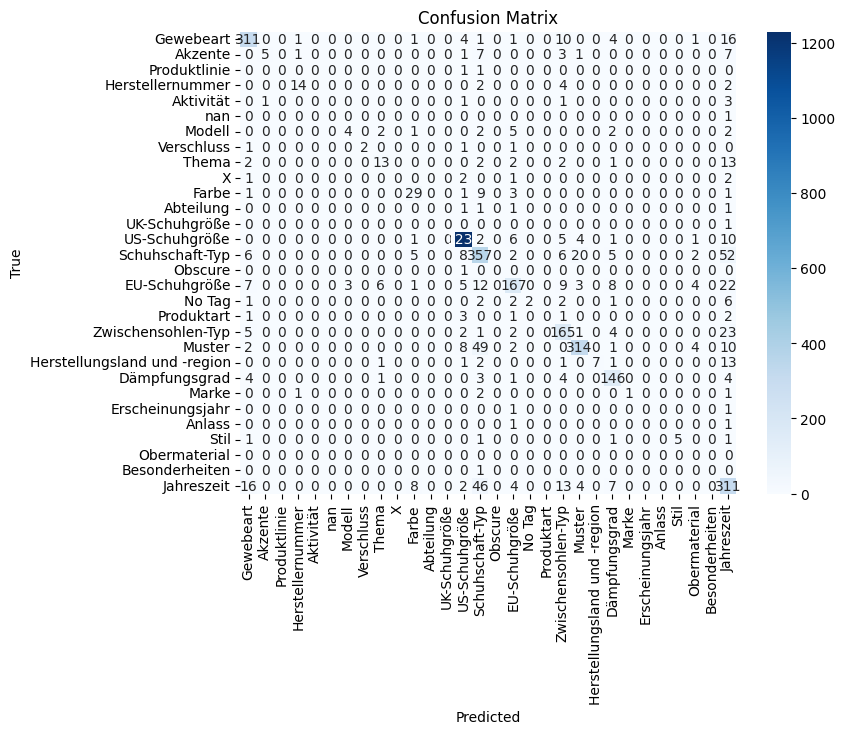

***** Eval results *****

                 precision    recall  f1-score   support

     Schuhgröße     0.5714    0.1818    0.2759        22
            Typ     1.0000    0.2593    0.4118        27
              _     0.0000    0.0000    0.0000         0
      ahreszeit     0.0000    0.0000    0.0000         1
             an     0.5796    0.6354    0.6062       384
           arbe     0.5714    0.3429    0.4286        35
           arke     0.9652    0.9706    0.9679      1257
       bteilung     0.8592    0.8592    0.8592       348
      erschluss     1.0000    0.5556    0.7143         9
erstellernummer     0.6000    0.5455    0.5714        44
  esonderheiten     0.0000    0.0000    0.0000         6
       ewebeart     0.0000    0.0000    0.0000         6
           hema     1.0000    0.2000    0.3333         5
       ktivität     0.8333    0.2000    0.3226        25
         kzente     0.0000    0.0000    0.0000         2
          nlass     0.8235    0.6364    0.7179        22
    

/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Marke seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Produktlinie seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Modell seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: No Tag seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: Abteilung seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequen

In [96]:
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0
y_true = []
y_pred = []

print("** Running evaluation **")
print("  Number examples ={}".format(len(val_inputs)))
print("  Batch size = {}".format(batch_num))
for step, batch in enumerate(valid_dataloader):
    batch = tuple(t.to(device) for t in batch)
    input_ids, input_mask, label_ids = batch

    with torch.no_grad():
        outputs = model(input_ids, token_type_ids=None,
        attention_mask=input_mask,)
        logits = outputs[0]

    # Get NER predict result
    logits = torch.argmax(F.log_softmax(logits,dim=2),dim=2)
    logits = logits.detach().cpu().numpy()


    # Get NER true result
    label_ids = label_ids.to('cpu').numpy()


    # Only predict the real word, mark=0, will not calculate
    input_mask = input_mask.to('cpu').numpy()

    # Compare the valuable predict result
    for i,mask in enumerate(input_mask):
        # Real one
        temp_1 = []
        # Predict one
        temp_2 = []

        for j, m in enumerate(mask):
            # Mark=0 dont compare
            if m:
                if tag2name[label_ids[i][j]] != "X" and tag2name[label_ids[i][j]] != "[CLS]" and tag2name[label_ids[i][j]] != "[SEP]" : # Exclude the X label
                    temp_1.append(tag2name[label_ids[i][j]])
                    temp_2.append(tag2name[logits[i][j]])
            else:
                break


        y_true.append(temp_1)
        y_pred.append(temp_2)



print("f1 socre: %f"%(f1_score(y_true, y_pred)))
print("Accuracy score: %f"%(accuracy_score(y_true, y_pred)))

# Get recall, F1 result report
report = classification_report(y_true, y_pred,digits=4)

flat_y_true = np.concatenate(y_true)
flat_y_pred = np.concatenate(y_pred)

cm = confusion_matrix(flat_y_true, flat_y_pred)
class_labels = list(set(flat_y_true) | set(flat_y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Save the report into file
output_eval_file = os.path.join(bert_out_address, "eval_results.txt")
with open(output_eval_file, "w") as writer:
    print("***** Eval results *****")
    print("\n%s"%(report))
    print("f1 socre: %f"%(f1_score(y_true, y_pred)))
    print("Accuracy score: %f"%(accuracy_score(y_true, y_pred)))

    writer.write("f1 socre:\n")
    writer.write(str(f1_score(y_true, y_pred)))
    writer.write("\n\nAccuracy score:\n")
    writer.write(str(accuracy_score(y_true, y_pred)))
    writer.write("\n\n")
    writer.write(report)

